# Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [1]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

## Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

In [2]:
#create numpy matrix data structure
A = np.matrix([[3, 5, 9], [3, 3, 4], [5, 9, 17]])
B = np.matrix('2;1;4')
#solve matrix equation Ax = B
x = np.linalg.solve(A,B)
x

matrix([[ 1.],
        [-2.],
        [ 1.]])

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [2]:


# function 1
def naiveMult(A,B):
    numrows = A.shape[0]
    numcols = B.shape[1]
    C = np.zeros((numrows, numcols))
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i,j] += A[i,k] * B[k,j]
    return C


# function 2 - numpy matrix multply
def numpyMult(A,B):
    C = np.dot(A,B)
    return C
    

#testing
A = np.array([[3, 5, 9], [3, 3, 4], [5, 9, 17]])
B = np.array([[1,-2,1]]).T
print(naiveMult(A,B))

A = np.array([[3, 5, 9], [3, 3, 4], [5, 9, 17]])
B = np.array([[1,-2,1]]).T
print(numpyMult(A,B))


[[ 2.]
 [ 1.]
 [ 4.]]
[[2]
 [1]
 [4]]


In [3]:
%load_ext Cython

In [4]:
%%cython
cimport numpy as np  # makes numpy available to cython
cimport numpy
import numpy
def cython_dot(np.ndarray[np.float64_t, ndim=2] a,
                np.ndarray[np.float64_t, ndim=2] b):
    numrows = a.shape[0]
    numcols = b.shape[1]
    C = numpy.zeros((numrows, numcols))
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                C[i,j] += a[i,k] * b[k,j]
    return C

In [5]:
L = 10
A = np.array([[3, 5, 9], [3, 3, 4], [5, 9, 17]])
B = np.array([[1,-2,1]]).T
cython_dot(A.astype('float64'),B.astype('float64'))

array([[ 2.],
       [ 1.],
       [ 4.]])

Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [40]:
import time
def performance(a,b,c):
    m = numpy.random.randint(1, 10, (a,b))
    n = numpy.random.randint(1, 10, (b,c))
    

    perform_list = []
    # make random axb and bxc matrix (just have the numbers between 1-10 in matrix)
    t1 = time.time()
    naiveMult(m,n)
    t2 = time.time()
    numpyMult(m,n)
    t3 = time.time()
    cython_dot(m.astype('float64'),n.astype('float64'))
    t4 = time.time()
    perform_list.append(("NAIVE", t2-t1))
    perform_list.append(("NUMPY", t3-t2))
    perform_list.append(("CYTHON", t4-t3))
    
    return perform_list

performance2(10,10,10)

[('NAIVE', 0.001055002212524414),
 ('NUMPY', 9.775161743164062e-06),
 ('CYTHON', 0.0002970695495605469)]

In [41]:

results_10 = performance(10,10,10)
results_75 = performance(75,75,75)
results_200 = performance(200,200,200)
results_1000 = performance(1000,1000,1000)
print("RESULTS")
print("results for 10:")
print(results_10)
print("results for 75:")
print(results_75)
print("results for 200:")
print(results_200)
print("results for 1000:")
print(results_1000)

RESULTS
results for 10:
[('NAIVE', 0.0011279582977294922), ('NUMPY', 2.5033950805664062e-05), ('CYTHON', 0.0002570152282714844)]
results for 75:
[('NAIVE', 0.33507704734802246), ('NUMPY', 0.00029087066650390625), ('CYTHON', 0.09711003303527832)]
results for 200:
[('NAIVE', 5.3039329051971436), ('NUMPY', 0.006309986114501953), ('CYTHON', 1.7387561798095703)]
results for 1000:
[('NAIVE', 692.270975112915), ('NUMPY', 2.1021668910980225), ('CYTHON', 249.8864941596985)]


In [ ]:
#From the results above we can see that NUMPY outperforms the others by a large amount. Cython is faster than Naive 
#python but not by as much compared to NUMPY.

### Note: Plots missing. (-0.5)

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

### IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. Set
2. Tuple

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [31]:
#1
datatypes = { 'object':'dictionary', 'array':'list', 'string':'string', 'integer':'integer', 'realnumber':'float,',
              'true':'True', 'false':'False', 'null':'None'}
#2
import pickle
#pickle.dump(datatypes, open('datatypes.pkl','wb'))
import gzip
pickle.dump(datatypes,gzip.open('datatypes.pkl','wb'),0)

#3
datatypes = pickle.load(gzip.open('datatypes.pkl','rb'))
for item in datatypes.items():
    print('The JSON equivalent for the Python datatype {py_datatype} is {json_datatype} '
          .format(py_datatype=item[1], json_datatype=item[0]))

#4
import json
datatypes2 = { 'dictionary':'object', 'list':'array', 'string':'string', 'integer':'integer', 'float':'realnumber,',
              'True':'true', 'False':'false', 'None':'null'}
json.dump(datatypes2,open('datatypes.json','wb'))
!ls *.pkl
!ls *.json

The JSON equivalent for the Python datatype False is false 
The JSON equivalent for the Python datatype string is string 
The JSON equivalent for the Python datatype dictionary is object 
The JSON equivalent for the Python datatype integer is integer 
The JSON equivalent for the Python datatype list is array 
The JSON equivalent for the Python datatype None is null 
The JSON equivalent for the Python datatype True is true 
The JSON equivalent for the Python datatype float, is realnumber 
datatypes.pkl
datatypes.json


## Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


### Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [131]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [38]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc.txt
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [37]:
#%%bash
#cd ~/Documents/DSE/ringhilt
#echo DSE200/day_2_github_io_numpy_pandas/data > .gitignore
#cd DSE200/day_2_github_io_numpy_pandas
#mkdir data
#cd data
#curl -O http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip
#unzip cup98lrn.zip
#rm cup98lrn.zip
#cd ~/Documents/DSE/ringhilt
#git status

Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [87]:
#1 - how many lines
!wc -l data/cup98LRN.txt

#2 Is the file character seperated or fixed width format?
f = open('data/cup98LRN.txt','r')
lines = f.readlines()
f.close()
print(lines[0][0:200]) #peak at file to see if fixed width or not
print(lines[1][0:200])

#3 Is there a header?  If so how many fields are in it?
headers = lines[0].split(',')
print("num of header fields is %s" %len(headers))

#4 Do all rows have the same number of fields as the header?
num_header_fields = len(headers)
for line in lines:
    fields = line.split(',')
    if len(fields) != num_header_fields:
        print('false')
# never prints false so all each row has same number of fields as header

# I do not see anything in 1-4 that disagrees with the readme file or indicates erronerous data, but looks like there
# are some empty fields (missing values)

   95413 data/cup98LRN.txt
ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HI
8901,GRI,0,IL,61081, , ,3712,0, , , , ,XXXX,T2,36,60, , , , , , ,,,F,,0,,,,,,,,,,,,,,, ,0,39,34,18,10,2,1, , , ,5, , , , , , , , , , , , , , , , , , , , ,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,
num of header fields is 481


Give answers to questions 1-4 in this markdown cell:

1.  95413 
2.  Not fixed width format (file has comma separted fields per line)
3.  Yes the file has a header, which has 481 fields
4.  yes, all rows have same number of fields as the header

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [88]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

In [12]:
learn = pd.read_csv('data/cup98LRN.txt', low_memory=False)
print(learn.shape)
learn.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [14]:
learn_y = learn.loc[:,('TARGET_B', 'TARGET_D')] # target columns
learn_y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [15]:
learn_x = learn[learn.columns.difference(['TARGET_B', 'TARGET_D'])] # all columns except target
print(learn_x.shape)

(95412, 479)


### Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non numerical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [46]:

#Do `(df_series.isnull() | np.isinf(df_series) | n
#p.isneginf(df_series)).sum()`, for numerical series, and `(series.isnull() | 
#series.str.isspace()).sum()`, for categorical series, count all of the missing data cases per column/series? 
def summary(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for column in df:
        print('\n')
        if df[column].dtype in numerics:
            print(df[column].name)
            print("mean: {0}".format(df[column].mean()))
            print("std_dev: {0}".format(df[column].std()))
            print("min: {0}".format(df[column].min()))
            print("max: {0}".format(df[column].max()))
            missing = df[column].isnull().sum() + np.isinf(df[column]).sum()
            print("missing: {0}".format(missing))
        else:
            print(df[column].name)
            print("distinct_values: {0}".format(len(df[column].unique())))
            missing = df[column].isnull().sum()
            for value in df[column]: # need to check for blank spaces
                if str(value).strip() == '' or value == np.inf or value == -np.inf:
                    missing = missing + 1
            print("missing: {0}".format(missing))
            print("\n3 most common: ")
            valcount_series = df[column].value_counts().nlargest(3)

            for col_val, count in valcount_series.iteritems():
                print('{0}: {1}'.format(col_val, count))

            print("\n3 least common")
            valcount_series = df[column].value_counts().nsmallest(3)

            for col_val, count in valcount_series.iteritems():
                print('{0}: {1}'.format(col_val, count))

summary(learn)



ODATEDW
mean: 9141.36325619
std_dev: 343.45475236
min: 8306
max: 9701
missing: 0


OSOURCE
distinct_values: 896
missing: 928

3 most common: 
MBC: 4539
SYN: 3563
AML: 3430

3 least common
FCC: 1
CWS: 1
SIF: 1


TCODE
mean: 54.2231165891
std_dev: 953.844475829
min: 0
max: 72002
missing: 0


STATE
distinct_values: 57
missing: 0

3 most common: 
CA: 17343
FL: 8376
TX: 7535

3 least common
AS: 1
DC: 1
DE: 3


ZIP
distinct_values: 19938
missing: 0

3 most common: 
85351: 61
92653: 59
85710: 54

3 least common
84757: 1
42503-: 1
49032: 1


MAILCODE
distinct_values: 2
missing: 94013

3 most common: 
 : 94013
B: 1399

3 least common
B: 1399
 : 94013


PVASTATE
distinct_values: 3
missing: 93954

3 most common: 
 : 93954
P: 1453
E: 5

3 least common
E: 5
P: 1453
 : 93954


DOB
mean: 2723.60293255
std_dev: 2132.24129477
min: 0
max: 9710
missing: 0


NOEXCH
distinct_values: 4
missing: 7

3 most common: 
0: 95085
1: 285
X: 35

3 least common
 : 7
X: 35
1: 285


RECINHSE
distinct_values: 2
missing

missing: 0


POP90C5
mean: 50.9513897623
std_dev: 5.76836101534
min: 0
max: 99
missing: 0


ETH1
mean: 84.8545046745
std_dev: 21.0138750263
min: 0
max: 99
missing: 0


ETH2
mean: 7.46740451935
std_dev: 16.6907710059
min: 0
max: 99
missing: 0


ETH3
mean: 0.776904372616
std_dev: 3.46931863456
min: 0
max: 99
missing: 0


ETH4
mean: 2.90570368507
std_dev: 7.06975933541
min: 0
max: 99
missing: 0


ETH5
mean: 7.45807655222
std_dev: 13.7860610398
min: 0
max: 99
missing: 0


ETH6
mean: 0.216010564709
std_dev: 0.679275007383
min: 0
max: 22
missing: 0


ETH7
mean: 0.3973504381
std_dev: 2.23216631942
min: 0
max: 72
missing: 0


ETH8
mean: 0.612805517126
std_dev: 2.53374346193
min: 0
max: 99
missing: 0


ETH9
mean: 0.561491217038
std_dev: 2.30920492894
min: 0
max: 67
missing: 0


ETH10
mean: 0.250586928269
std_dev: 1.00352961652
min: 0
max: 46
missing: 0


ETH11
mean: 0.21030897581
std_dev: 1.05412097974
min: 0
max: 47
missing: 0


ETH12
mean: 0.0683876241982
std_dev: 1.16967142848
min: 0
max: 72

min: 0
max: 99
missing: 0


IC20
mean: 6.58441286211
std_dev: 6.66617633561
min: 0
max: 99
missing: 0


IC21
mean: 2.60261811931
std_dev: 3.9071942704
min: 0
max: 50
missing: 0


IC22
mean: 1.1226994508
std_dev: 2.32172598768
min: 0
max: 99
missing: 0


IC23
mean: 2.28186182032
std_dev: 5.53129683519
min: 0
max: 99
missing: 0


HHAS1
mean: 26.7633526181
std_dev: 13.8648837576
min: 0
max: 99
missing: 0


HHAS2
mean: 6.10250282983
std_dev: 6.21559423245
min: 0
max: 99
missing: 0


HHAS3
mean: 42.9629711147
std_dev: 17.054347343
min: 0
max: 99
missing: 0


HHAS4
mean: 10.7409026118
std_dev: 9.96740863642
min: 0
max: 99
missing: 0


MC1
mean: 48.361977529
std_dev: 15.9765353476
min: 0
max: 99
missing: 0


MC2
mean: 50.746887184
std_dev: 16.0446068455
min: 0
max: 99
missing: 0


MC3
mean: 12.2761811931
std_dev: 10.2551395831
min: 0
max: 99
missing: 0


TPE1
mean: 76.0955959418
std_dev: 13.2896589359
min: 0
max: 99
missing: 0


TPE2
mean: 12.997495074
std_dev: 6.69776312122
min: 0
max: 99
mi

std_dev: 0.493626139592
min: 0
max: 30
missing: 0


HC16
mean: 5.29873600805
std_dev: 10.4031228444
min: 0
max: 99
missing: 0


HC17
mean: 82.6304972121
std_dev: 28.4652996249
min: 0
max: 99
missing: 0


HC18
mean: 15.1528633715
std_dev: 26.7041076161
min: 0
max: 99
missing: 0


HC19
mean: 71.9445667212
std_dev: 35.5810577955
min: 0
max: 99
missing: 0


HC20
mean: 97.5615645831
std_dev: 9.62605223084
min: 0
max: 99
missing: 0


HC21
mean: 94.3938812728
std_dev: 10.7396704807
min: 0
max: 99
missing: 0


MHUC1
mean: 8.11283695971
std_dev: 3.53098006847
min: 0
max: 21
missing: 0


MHUC2
mean: 2.3315515868
std_dev: 0.86686881427
min: 0
max: 5
missing: 0


AC1
mean: 5.82587095963
std_dev: 2.87034354026
min: 0
max: 99
missing: 0


AC2
mean: 5.98133358487
std_dev: 3.25216491799
min: 0
max: 99
missing: 0


ADATE_2
mean: 9705.9997275
std_dev: 0.0233438701811
min: 9704
max: 9706
missing: 0


ADATE_3
mean: 9605.99961482
std_dev: 0.0277529537346
min: 9604.0
max: 9606.0
missing: 1950


ADATE_4
mean

missing: 87524


RAMNT_21
mean: 12.9420508777
std_dev: 10.6929589073
min: 1.0
max: 300.0
missing: 85899


RAMNT_22
mean: 12.266252096
std_dev: 9.17931650608
min: 0.29
max: 300.0
missing: 74539


RAMNT_23
mean: 12.1499452857
std_dev: 9.34270460603
min: 0.3
max: 200.0
missing: 87553


RAMNT_24
mean: 11.3648906303
std_dev: 8.70803198967
min: 1.0
max: 225.0
missing: 77674


RAMNTALL
mean: 104.48935113
std_dev: 118.580366902
min: 13.0
max: 9485.0
missing: 0


NGIFTALL
mean: 9.60203119105
std_dev: 8.55434151301
min: 1
max: 237
missing: 0


CARDGIFT
mean: 5.05824214983
std_dev: 4.52665058693
min: 0
max: 41
missing: 0


MINRAMNT
mean: 7.93365572465
std_dev: 8.78423058699
min: 0.0
max: 1000.0
missing: 0


MINRDATE
mean: 9252.65099778
std_dev: 267.511838355
min: 7506
max: 9702
missing: 0


MAXRAMNT
mean: 19.9997897539
std_dev: 25.0677456382
min: 5.0
max: 5000.0
missing: 0


MAXRDATE
mean: 9441.86042636
std_dev: 172.87047138
min: 7510
max: 9702
missing: 0


LASTGIFT
mean: 17.3131269652
std_dev: 1

 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [3]:
!pwd
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data > data/CalIt2.data
!ls data
calit2_df = pd.read_csv('data/CalIt2.data', header=None, low_memory=False)
#!head data/CalIt2.data
calit2_df.columns =['Flow ID', 'Date', 'Time', 'Count']
calit2_df.head()

/Users/ryan/Documents/DSE/ringhilt/DSE200/day_2_github_io_numpy_pandas
CalIt2.data  cup98LRN.txt


,Flow ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
3,9,07/24/05,00:30:00,0
4,7,07/24/05,01:00:00,0


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [5]:
result = calit2_df.loc[(calit2_df['Date'] == '07/24/05') & (calit2_df['Flow ID'] == 7)]
print(result)

    Flow ID      Date      Time  Count
0         7  07/24/05  00:00:00      0
2         7  07/24/05  00:30:00      1
4         7  07/24/05  01:00:00      0
6         7  07/24/05  01:30:00      0
8         7  07/24/05  02:00:00      0
10        7  07/24/05  02:30:00      2
12        7  07/24/05  03:00:00      0
14        7  07/24/05  03:30:00      0
16        7  07/24/05  04:00:00      0
18        7  07/24/05  04:30:00      0
20        7  07/24/05  05:00:00      0
22        7  07/24/05  05:30:00      0
24        7  07/24/05  06:00:00      0
26        7  07/24/05  06:30:00      0
28        7  07/24/05  07:00:00      0
30        7  07/24/05  07:30:00      2
32        7  07/24/05  08:00:00      0
34        7  07/24/05  08:30:00      0
36        7  07/24/05  09:00:00      0
38        7  07/24/05  09:30:00      1
40        7  07/24/05  10:00:00      0
42        7  07/24/05  10:30:00      0
44        7  07/24/05  11:00:00      1
46        7  07/24/05  11:30:00      0
48        7  07/24/05  12

In [6]:
print('the row count of results is {0}'.format(result.shape[0]))

the row count of results is 48


In [7]:
#2-Select all rows whose count is greater than 5.Sort the result on count in descending order and output the top 10 rows
result2 = calit2_df.loc[calit2_df['Count'] > 5].sort_values('Count', ascending=False).iloc[:10]
print(result2)

      Flow ID      Date      Time  Count
6879        9  10/03/05  15:30:00     62
335         9  07/27/05  11:30:00     61
6881        9  10/03/05  16:00:00     55
9686        7  11/01/05  21:30:00     54
9682        7  11/01/05  20:30:00     54
9681        9  11/01/05  20:00:00     53
6878        7  10/03/05  15:30:00     52
9933        9  11/04/05  11:00:00     50
8913        9  10/24/05  20:00:00     50
3615        9  08/30/05  15:30:00     50


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [8]:
#1

count_min = result2['Count'].min()
count_sum = result2['Count'].apply(lambda x: x - count_min).sum()
average = float(count_sum) / result2['Count'].count()
print(average)

#2

def my_test2(row):
    return (row['Date'] == '07/24/05') & (row['Flow ID'] == 9)

filtered_df = calit2_df[calit2_df.apply(my_test2, axis=1)] # first
#print(filtered_df.head())
print(float(filtered_df.apply(np.sum)['Count']))



4.1
16.0


#### Indexing an Selecting ####
Explain the following

1. loc: 
label based
Allows you to pass 1-D arrays as indexers. Arrays can be either slices (subsets) of the index or column, or they can be boolean arrays which are equal in length to the index or columns.
2. iloc:
position based
Similar to loc except with positions rather that index values. However, you cannot assign new columns or indices.
3. ix: 
You can get data from dataframe without it being in the index
ix uses both labels and positions.

4. at:
Works very similar to loc for scalar indexers. Cannot operate on array indexers. Can assign new indices and columns.
5. iat:
Works very similar to iloc Cannot work in array indexers. Cannot assign new indices and columns.


Highlight the differences by providing usecases where one is more useful than the other
Special Note: when a scalar indexer is passed, loc can assign a new index or column value that didn't exist before.

 1. loc: is label based, but we can use position values
 to get the labels from the index object
    <br>df.loc[df.index[2], 'ColName'] = 3
 2. iloc: is good if you have the row or column number of the values in the dataframe you want
     <br> However, you cannot assign new columns or indices.
     example of iloc lets say you know you want the first 10 row of the last column of a dataframe you can do
     <br> df.iloc[:10, -1]
 3. ix: advantage is getting data from dataframe without it being in the index
     <br> Example: df.ix[[0, 2], 'A']
 4. at:
  <br>Advantage over loc is that this is faster.
  <br>Disadvantage is that you can't use arrays for indexers. Example:
  <br> df.at['C', 'ColName'] = 3
 5. iat:
    <br>Advantage over iloc is that this is faster.
    <br>Disadvantage is that you can't use arrays for indexers.
    <br>Example: df.iat[1,1] gets faster access then df.iloc[1,1]

Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [9]:
def in_date_range(date1,date2):
    df = calit2_df
    date1 = pd.to_datetime(date1)
    date2 = pd.to_datetime(date2)
    valid_dates = df.loc[(pd.to_datetime(df['Date']) >= date1) & (pd.to_datetime(df['Date']) <= date2)]
    valid_flows = valid_dates['Flow ID'].unique()
    valid_counts = valid_dates['Count'].unique()
    return valid_flows, valid_counts

# test function
valid_flows, valid_counts = in_date_range('11/03/04', '11/03/05')
print("valid flows {0}".format(valid_flows))
print("valid counts {0}".format(valid_counts))
print(len(valid_counts))

valid flows [7 9]
valid counts [ 0  1  2  3  4  7  6  5 13 16  9 11 12 18 14 10 17  8 22 26 25 23 61 33 24
 15 28 21 19 31 20 36 44 40 38 34 39 29 42 50 47 32 37 35 27 52 62 49 55 30
 43 41 53 54 46]
55


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [49]:
#1
sub_df = calit2_df.loc[(calit2_df['Date'].str.startswith('08')) & 
                       (calit2_df['Flow ID'] == 7) &
                       (calit2_df['Date'].str.endswith('05'))]
print(sub_df.head()) #just print out head not whole thing to save space
print(sub_df.shape) # shows the row count is correct

#2
print(sub_df.groupby('Date').max())

     Flow ID      Date      Time  Count
768        7  08/01/05  00:00:00      1
770        7  08/01/05  00:30:00      0
772        7  08/01/05  01:00:00      0
774        7  08/01/05  01:30:00      0
776        7  08/01/05  02:00:00      0
(1488, 4)
          Flow ID      Time  Count
Date                              
08/01/05        7  23:30:00     18
08/02/05        7  23:30:00     16
08/03/05        7  23:30:00     26
08/04/05        7  23:30:00     40
08/05/05        7  23:30:00     17
08/06/05        7  23:30:00      8
08/07/05        7  23:30:00      3
08/08/05        7  23:30:00     16
08/09/05        7  23:30:00     19
08/10/05        7  23:30:00     25
08/11/05        7  23:30:00     16
08/12/05        7  23:30:00     21
08/13/05        7  23:30:00      5
08/14/05        7  23:30:00      3
08/15/05        7  23:30:00     17
08/16/05        7  23:30:00     24
08/17/05        7  23:30:00     22
08/18/05        7  23:30:00     39
08/19/05        7  23:30:00     23
08/20/05       

#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

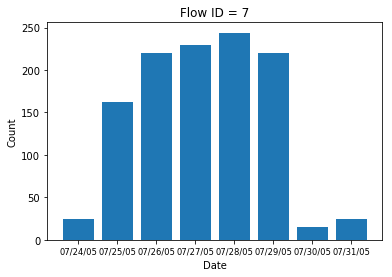

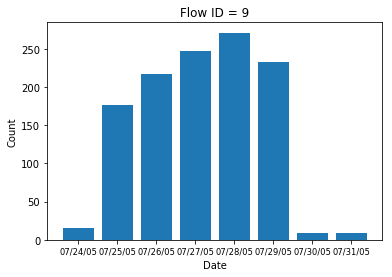

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

jul_df = calit2_df.loc[calit2_df['Date'].str.startswith('07') & 
                       (calit2_df['Date'].str.endswith('05'))]

flow7 = jul_df.loc[jul_df['Flow ID'] == 7].groupby('Date').sum()
flow9 = jul_df.loc[jul_df['Flow ID'] == 9].groupby('Date').sum()

flow7 = flow7.reset_index()
flow9 = flow9.reset_index()


plt.bar(range(len(flow7['Count'])), flow7['Count'], align='center')
plt.xticks(range(len(flow7['Date'])), flow7['Date'], size='small')
plt.title('Flow ID = 7')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

plt.bar(range(len(flow9['Count'])), flow9['Count'], align='center')
plt.xticks(range(len(flow9['Date'])), flow9['Date'], size='small')
plt.title('Flow ID = 9')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()



# Total = 14.56